In [1]:
# just suppressing the CUDA warnings from keras
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# importing the required modules
import sys
sys.path.insert(1, '/nfs/dust/cms/user/flabe/L1Trigger/Jupyter/run3/framework/src')
from loadData import readFromL1Ntuple, readFromAnomalyBackgroundh5, readFromAnomalySignalh5
from preprocessing import prepareData
from inference import runInference, defineTriggerFromThreshold
from plotting import plotSculpting

In [2]:
# reading the data
info, data, trigger_bits = readFromL1Ntuple(
    "/nfs/dust/cms/user/flabe/L1Trigger/data/root/fromAnomaly/GluGluToHHTo4B_node_cHHH1_TuneCP5_14TeV-powheg-pythia8/mcRun3_Run3Summer21DRPremix-120X_v6-v2/211224_001418/0000",
    "/nfs/dust/cms/user/flabe/L1Trigger/Jupyter/run3/framework/data/Prescale_2022_v0_1_1.csv",
    moreInfo = {"input": "HH to 4B SM"},
    verbosity = 1)

Reading from L1 ntuples in /nfs/dust/cms/user/flabe/L1Trigger/data/root/fromAnomaly/GluGluToHHTo4B_node_cHHH1_TuneCP5_14TeV-powheg-pythia8/mcRun3_Run3Summer21DRPremix-120X_v6-v2/211224_001418/0000.
Found 66 files.
Starting to read objects...
Starting to read L1 trigger bits...
Done!


In [3]:
# defining model info
model_folder = "/nfs/dust/cms/user/flabe/L1Trigger/Jupyter/run3/models/haa4b_ma60__newFormat/"
model_name = "model_fold0.h5"

In [4]:
# preparinf the data and running the inference

x = prepareData(model_folder, data, verbosity=1)
y_pred = runInference(model_folder + model_name, x, verbosity = 1)
trigger_bit = defineTriggerFromThreshold(y_pred, 0.999, "L1_NN", verbosity = 1)

Preparing data for type topo...
Loading model from /nfs/dust/cms/user/flabe/L1Trigger/Jupyter/run3/models/haa4b_ma60__newFormat/model_fold0.h5...
Starting inference...
Defining Trigger by requiring score > 0.999.


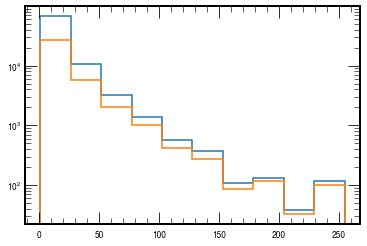

In [5]:
plotSculpting(data["muons"].pt, trigger_bit)